# Logistic Regression을 이용한 부도예측

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import os

## 데이터 전처리 및 train, valid, test set 분리

In [4]:
def train_test_valid(file_name, valid=True):
    raw = pd.read_csv(f"{data_path}/{file_name}")
    
    # 데이터셋 분할
    from sklearn.model_selection import train_test_split
    X_train_valid, X_test, y_train_valid, y_test = train_test_split(raw.iloc[:,:-1],raw.iloc[:,-1],
                                                       random_state = 1)
    
    if valid:
        X_train,X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.2,
                                                            random_state = 1)

        # 표준화
        from sklearn.preprocessing import StandardScaler, MinMaxScaler
        scaler = MinMaxScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_valid = scaler.transform(X_valid)
        X_test = scaler.transform(X_test)

        return X_train,X_valid,X_test,y_train,y_valid,y_test
    else:
         # 표준화
        from sklearn.preprocessing import StandardScaler, MinMaxScaler
        scaler = MinMaxScaler().fit(X_train_valid)
        X_train_valid = scaler.transform(X_train_valid)
        X_test = scaler.transform(X_test)
        
        return X_train_valid, X_test, y_train_valid, y_test

In [8]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score, accuracy_score
def get_score(X_test, y_test, term,model):
    predicted = model.predict(X_test).round()
    accuracy = accuracy_score(y_test, predicted)
    precision = precision_score(y_test,predicted)
    recall = recall_score(y_test, predicted)
    confusion = confusion_matrix(y_test, predicted)
    roc = roc_auc_score(y_test, predicted)
    return accuracy, precision, recall, confusion, roc

## 년도별 accuracy, recall, precision, roc 비교

In [2]:
from sklearn.linear_model import LogisticRegression

In [9]:
models = []
result = {}
valid = True

# 파일명 읽어오기
data_path = os.path.join(".","final_data")
file_names = os.listdir(data_path)

# 하이퍼 파라미터 지정
learning_rate = 1e-4
max_epoch = 50

for idx, file_name in enumerate(file_names):
    # 해당 파일의 년도 추출
    term = int(file_name.split("y")[0])
    print(f"{term}년도 데이터 훈련시작")
    
    # 데이터 분할
    X_train,X_test, y_train,y_test = train_test_valid(file_name, valid=False)
    
    # 모델 구현
    models.append(LogisticRegression())
    models[idx].fit(X_train,y_train)
    
    # 모델 평가
    a={i:j for i,j in zip(["accuracy", "precision", "recall", "confusion", "roc"],get_score(X_test,y_test,term,models[idx]))}
    result[f"{term}year"]=a

10년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


11년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


12년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


13년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


14년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


15년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


16년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


17년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


18년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


6년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


8년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


9년도 데이터 훈련시작


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
pd.DataFrame(result)

,10year,11year,12year,13year,14year,15year,16year,17year,18year,1year,2year,3year,4year,5year,6year,7year,8year,9year
accuracy,0.910529,0.905754,0.902993,0.913675,0.906005,0.917168,0.901925,0.902235,0.905983,0.901035,0.907987,0.907444,0.907132,0.909435,0.907899,0.91038,0.903767,0.912442
precision,0.655172,0.648276,0.628571,0.640449,0.609929,0.657407,0.533333,0.566667,0.5625,0.665385,0.669276,0.661795,0.647059,0.650442,0.682819,0.665012,0.6375,0.649701
recall,0.489461,0.48329,0.463855,0.452381,0.407583,0.449367,0.357143,0.435897,0.486486,0.351269,0.389522,0.389435,0.409574,0.428571,0.456554,0.455782,0.461957,0.470716
confusion,"[[3129, 110], [218, 209]]","[[2724, 102], [201, 188]]","[[2350, 91], [178, 154]]","[[2024, 64], [138, 114]]","[[1649, 55], [125, 86]]","[[1302, 37], [87, 71]]","[[944, 35], [72, 40]]","[[612, 26], [44, 34]]","[[300, 14], [19, 18]]","[[7056, 174], [639, 346]]","[[6615, 169], [536, 342]]","[[6144, 162], [497, 317]]","[[5670, 168], [444, 308]]","[[5229, 158], [392, 294]]","[[4747, 144], [369, 310]]","[[4354, 135], [320, 268]]","[[3896, 145], [297, 255]]","[[3545, 117], [244, 217]]"
roc,0.72775,0.723599,0.713288,0.710865,0.687653,0.710867,0.660696,0.697573,0.72095,0.663601,0.682305,0.681873,0.690399,0.699621,0.713556,0.712854,0.713037,0.719383


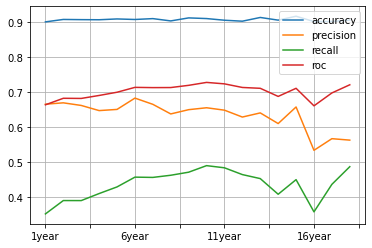

In [11]:
a=[f"{i}year" for i in range(1,19)]
result_df = pd.DataFrame(result)[a]

result_df.T.plot()
plt.grid()

- 10개년의 recall이 가장 좋음
- 전반적으로 precision, accuracy에 비해 recall이 낮음 -> 다수의 class인 0으로 예측하는 경향성

## 10개년으로 부도위험 예측

In [12]:
best_term = 10 # 가장 성능이 좋은 term
X_train, X_test, y_train,y_test = train_test_valid(f"{best_term}year.csv",valid=False)

### 부도 위험이 높은 class 데이터 oversampling

In [13]:
(y_train==1).sum()

1242

In [14]:
y_train.values

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [15]:
X_train = np.concatenate([X_train,X_train[y_train==1]])
y_train = np.concatenate([y_train.values, np.ones((y_train==1).sum())])

### 모델 훈련

In [16]:
best_lr = LogisticRegression()
best_lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 평가

In [17]:
accuracy, precision, recall, matrix, roc = get_score(X_test,y_test,best_term,best_lr)
print("accuracy : {:.2}".format(accuracy))
print("precision : {:.2}".format(precision))
print("recall : {:.2}".format(recall))
print("roc : {:.2}".format(roc))
print("confusion-matrics")
print(matrix)

accuracy : 0.9
precision : 0.57
recall : 0.64
roc : 0.79
confusion-matrics
[[3033  206]
 [ 152  275]]
